In [1]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, BasicAer
from IPython.core.display import Image, display


<h1 align="center">
<span style="color: blue;">$\textbf{Quantum Oracles}$</center>
</h1>

Quantum Oracle is a black box used extensively in quantum algorithms for
the estimation of functions using qubits. Estimation in a classical computer is set up with an $n$ -dimensional input $x$ producing an $m$ -dimensional output $f(x)$

$$
f:\{0,1\}^{n} \rightarrow\{0,1\}^{m}
$$

The $n$ -dimensional vector $x$ is encoded as quantum information by
considering $n$ qubits each storing a single bit of information as below

$$
|x\rangle=\left|x_{0}\right\rangle \otimes\left|x_{1}\right\rangle \otimes \cdots \otimes\left|x_{n-1}\right\rangle
$$

Quantum oracles help transform a system from a quantum state $|x\rangle$ into a state $|f(x)\rangle,$ through the evolution of quantum states.

<img src="Images/oracle.jpeg" alt="drawing" width="600"/>


<h1 align="center">
<span style="color: red;">$\textbf{Deutsch-Jozsa Algorithm}$</center>
</h1>

<span style="color: blue;">Deutsch’s algorithm was the first to demonstrate a clear advantage of quantum over classical computing.Deutsch-Jozsa algorithm is the $n$ qubit version of the Deutsch algorithm.The functions now take $n$ bit strings (e.g. "0101011") as an input and return one bit output ($0$ or $1$). Bob still is allowed only to use either balanced or constant functions and Alice should find out the property of that function.Bob has two options for constant functions (for all input bit strings $x$ the $f(x) = 0$ or $f(x) = 1$) and $\begin{pmatrix} 2^n \\ 2^{n - 1} \end{pmatrix}$ options to choose a balanced function.

Let's begin with an example. Suppose I buy two standard decks of 52 playing cards. In a separate room where you cannot see me, I create a single deck of 52 cards where one of the following is true:
1. All the cards are red or all the cards are black.
2. Half the cards (26) are black and half are red.

<span style="color: red;">The first option is called "constant" and the second is "balanced."

I now go to you and give you the problem of finding out which of the two possibilities is the case for the deck I am holding. You do so by looking at and then discarding the card at the top of the deck.

In the best case, the first card is one color and the second is the other. Therefore the deck is balanced. In the worst case you must examine $27=1+52 / 2$ cards. The first 26 cards might be black, say. If the next is black, then all are black. If it is red, the deck is balanced.

Regarding an oracle, we are asking "is the card at the top of the deck black?". It returns 1 if it is, 0 if it is red. As I stated, we must consult the oracle 27 times in the worst case to get the
correct answer.

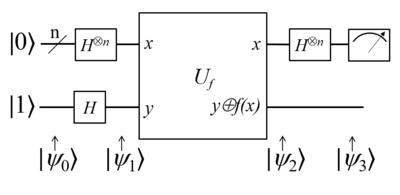

In [2]:
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png/400px-Deutsch-Jozsa-algorithm-quantum-circuit.png', width=500, unconfined=True))

The main steps of the algorithm are presented in the following circuit:
The algorithm begins with the $n+1$ bit state $|0\rangle^{\otimes n}|1\rangle .$ That is, the first n bits are each in the state |0\rangle and the final bit is $|1\rangle .$ A Hadamard transform is applied to each bit to obtain
the state

$$
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|0\rangle-|1\rangle)
$$

We have the function $f$ implemented as a quantum oracle. The oracle maps the state $|x\rangle|y\rangle$ to $|x\rangle|y \oplus f(x)\rangle,$ where $\oplus$ is addition modulo 2. Applying the quantum oracle gives

$$
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|f(x)\rangle-|1 \oplus f(x)\rangle)
$$

For each $x, f(x)$ is either 0 or 1 . Testing these two possibilities, we see the above state is equate

$$
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle(|0\rangle-|1\rangle)
$$

At this point the last qubit $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ may be ignored and therefore below is remained:

$$
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle
$$

We apply a Hadamard transform to each qubit to obtain

$$
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\left[\frac{1}{\sqrt{2^{n}}} \sum_{y=0}^{2^{n}-1}(-1)^{x \cdot y}|y\rangle\right]=\frac{1}{2^{n}} \sum_{y=0}^{2^{n}-1}\left[\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}(-1)^{x \cdot y}\right]|y\rangle
$$

where $x \cdot y=x_{0} y_{0} \oplus x_{1} y_{1} \oplus \cdots \oplus x_{n-1} y_{n-1}$ is the sum of the bitwise product.
Finally we examine the probability of measuring $|0\rangle^{\otimes n}$

$$
\left|\frac{1}{2^{n}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\right|^{2}
$$

which evaluates to 1 if $f(x)$ is constant (constructive interference) and 0 if $f(x)$ is balanced (destructive interference). In other words, the final measurement will be $|0\rangle^{\otimes n}$ (i.e. all zeros) if $f(x)$ is constant and will yield some other states if $f(x)$ is balanced.

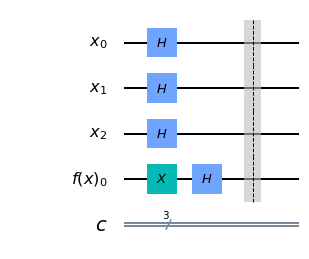

In [3]:
# Alice: qubit preparation
input_register = QuantumRegister(3, "x")
output_register = QuantumRegister(1, "f(x)")
classical_register = ClassicalRegister(3, "c")

circuit_Deutsch_Jozsa = QuantumCircuit(input_register, output_register, classical_register)

# Prepare the qubit in the output register in the |1> state
circuit_Deutsch_Jozsa.x(output_register[0])

# Hadamard gates on both input and output registers
circuit_Deutsch_Jozsa.h(input_register) # Hadamard gate is applied to all qubits in the input_register
circuit_Deutsch_Jozsa.h(output_register[0])

# Add a barrier
circuit_Deutsch_Jozsa.barrier()
circuit_Deutsch_Jozsa.draw('mpl')


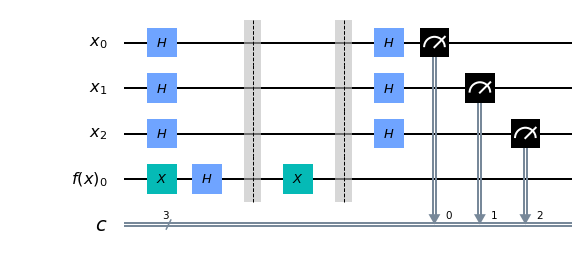

In [4]:
# Circuit for the constant function
circtuit_Deutsch_Jozsa_constant  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_constant += circuit_Deutsch_Jozsa

# Implementing the f(x) = 1 constant function
circtuit_Deutsch_Jozsa_constant.x(output_register[0])

# Add a barrier
circtuit_Deutsch_Jozsa_constant.barrier()

# Final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_constant.h(input_register)

# Measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_constant.measure(input_register, classical_register)

# Draw the circuit
circtuit_Deutsch_Jozsa_constant.draw(output="mpl")

In [5]:
# A function that will help Alice to define if
# the chosen function was balanced or constant 
def is_balanced_or_constant(circuit, bakend):
    # The execution of the circuit
    counts = execute(circuit, bakend, shots=1).result().get_counts()

    # Finding the only key/measurement outcome
    measurement_result = list(counts.keys())[0]
    print("The results of the measurements: {}".format(counts))
    print("The final result is: {}".format(measurement_result))

    # Alice checks if Bob's function was constant or balanced
    if '000' in counts:
        print("Bob's chosen function was constant")
    else:
        print("Bob's chosen function was balanced")

In [6]:
# Alice uses is_balanced_or_constant() function
simulator = Aer.get_backend('qasm_simulator')
is_balanced_or_constant(circtuit_Deutsch_Jozsa_constant, simulator)

The results of the measurements: {'000': 1}
The final result is: 000
Bob's chosen function was constant


Now we will do the same calculations but for a balanced $f(x)$ function that we have used in the quantum parallelism chapter.

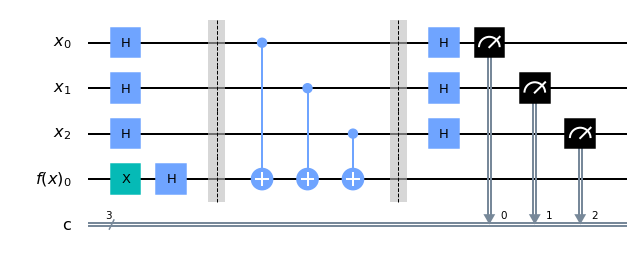

In [15]:
# Circuit for the balanced case
circtuit_Deutsch_Jozsa_balanced  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_balanced += circuit_Deutsch_Jozsa

# implementing the balanced function
circtuit_Deutsch_Jozsa_balanced.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[1], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[2], output_register[0])

# add a barrier
circtuit_Deutsch_Jozsa_balanced.barrier()

# final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.h(input_register)


# measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.measure(input_register, classical_register)

# draw the circuit
circtuit_Deutsch_Jozsa_balanced.draw(output="mpl")

In [16]:
# Alice uses is_balanced_or_constant() function
simulator = Aer.get_backend('qasm_simulator')
is_balanced_or_constant(circtuit_Deutsch_Jozsa_balanced, simulator)

The results of the measurements: {'111': 1}
The final result is: 111
Bob's chosen function was balanced
